# Using SMAC to optimize an artificial black box function (Full example)

* Installation of SMAC and its dependencies
* Definition of cheap 1d function
* Plotting this function
* Using SMAC's fmin interface to optimize the function
* Plotting of how SMAC performed over time
* Visualizing SMAC's acquisition function
* Using other hyperparameters of SMAC's random forest to obtain better predictions

## Installation of SMAC and its Dependencies

In [119]:
!apt-get install swig -y
!pip install Cython
!pip install pyrfr==0.8.0 --no-cache --user
# hack to find pyrfr
import sys
sys.path.insert(0,"./.local/lib/python3.6/site-packages")

!pip install git+https://github.com/automl/SMAC3.git@development

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.10-1.2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
  Cloning https://github.com/automl/SMAC3.git (to revision development) to /tmp/pip-req-build-qitgll05
  Running setup.py bdist_wheel for smac ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-bvl8bubu/wheels/f4/8d/4f/2ba4cb80693f139ea06c2e8541e012a93738fb56bc1e43a202
Successfully built smac


## Installation of Pep8

In [120]:
!pip install pycodestyle
!pip install pycodestyle_magic
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


## Define Functions

### Define Goldstein Function

In [0]:
#%%pycodestyle

import math
import numpy as np


def goldstein_func(x):
    # x is vector; here of length 2
    x1 = x[0]
    x2 = x[1]
    a = 1 + ((x1 + x2 + 1)**2)*(19 - 14*x1 + 3*(x1**2) - 14*x2 + 6*x1*x2 + 3*(x2**2))
    b = 30 + ((2*x1 - 3*x2)**2)*(18 - 32*x1 + 12*(x1**2) + 48*x2 - 36*x1*x2 + 27*(x2**2))

    f_opt = 3

    # print(a*b)

    if (a*b - f_opt == 0):
        return 0
    else:
        return math.log(a*b - f_opt)

### Define Bohachevsky Function

In [0]:
#%%pycodestyle

from math import pi


def bohachevsky_func(z):
    x = z[0]
    y = z[1]
    z = x**2 + 2*y**2 - 0.3*math.cos(3*pi*x) - 0.4*math.cos(4*pi*y) + 0.7
    if(z == 0):
        res = 0
    else:
        res = math.log(z)
    return res

### Define Branin Function

In [0]:
#%%pycodestyle

def branin_func(z):
    x = z[0]
    y = z[1]
    a = 1
    b = 5.1/(4*pi**2)
    c = 5/pi
    r = 6
    s = 10
    t = 1/(8*pi)
    z = a*(y - b*x**2 + c*x - r)**2 + s*(1-t)*math.cos(x) + s
    if(z-0.397887 == 0):
        res = 0
    else:
        res = math.log(z-0.397887)
    return res

## Plot Functions

### Plot Goldstein Function

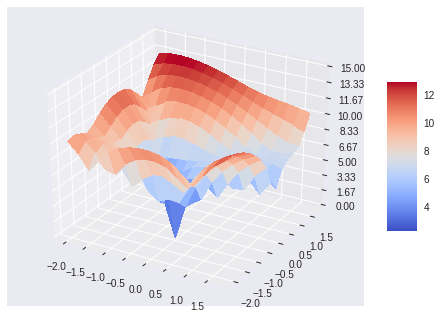

In [124]:
#%%pycodestyle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)

X_gold, Y_gold = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_gold)):
    K = np.array([])
    for j in range(0, len(X_gold[i])):
        a = goldstein_func([X_gold[i][j], Y_gold[i][j]])
        K = np.append(K, [[a]])
    R.append(K)

Z_gold = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_gold, Y_gold, Z_gold, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 15)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot Bohachevsky Function

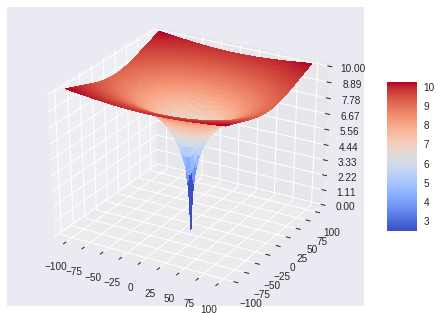

In [125]:
#%%pycodestyle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-100, 100, 0.25)
Y = np.arange(-100, 100, 0.25)


X_boha, Y_boha = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_boha)):
    K = np.array([])
    for j in range(0, len(X_boha[i])):
        a = bohachevsky_func([X_boha[i][j], Y_boha[i][j]])
        K = np.append(K, [[a]])
    R.append(K)

Z_boha = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_boha, Y_boha, Z_boha, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot Branin Function

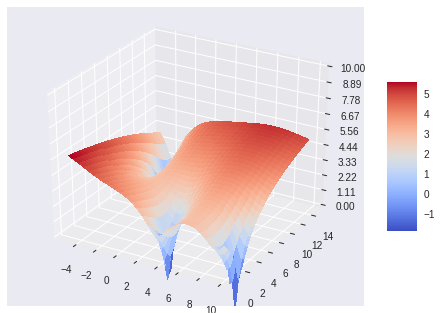

In [126]:
#%%pycodestyle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 10, 0.25)
Y = np.arange(0, 15, 0.25)

X_branin, Y_branin = np.meshgrid(X, Y)

R = []

for i in range(0, len(X_branin)):
    K = np.array([])
    for j in range(0, len(X_branin[i])):
        a = branin_func([X_branin[i][j], Y_branin[i][j]])
        K = np.append(K, [[a]])
    R.append(K)

Z_branin = np.asarray(R)


# Plot the surface.
surf = ax.plot_surface(X_branin, Y_branin, Z_branin, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Optimize with SMAC

In [0]:
#%%pycodestyle

num_smac_runs = 20

### Optimize Goldstein Function

In [128]:
#%%pycodestyle

from smac.facade.func_facade import fmin_smac


MAX_FUN_gold = 200

smac_list_gold = []
X_list_gold = []
cost_list_gold = []
for i in range(0, num_smac_runs):
    X, cost, smac = fmin_smac(func=goldstein_func,
                              x0=[-2, 2],  # default values
                              bounds=[(-2, 2), (-2, 2)],  # bounds of each x
                              maxfun=MAX_FUN_gold,  # maximal number of function evaluations
                              rng=np.random.RandomState(42 + i)  # random seed
                              )
    smac_list_gold.append(smac)
    X_list_gold.append(X)
    cost_list_gold.append(cost)

    print("Best x: %f" % (X[0]))
    print("Best y: %f" % (X[1]))
    print("Best z: %f" % (cost))


Best x: 0.003319
Best y: -0.999562
Best z: -5.973751
Best x: -0.011274
Best y: -1.008585
Best z: -3.136379
Best x: 0.001376
Best y: -0.997221
Best z: -5.815990
Best x: -0.013279
Best y: -0.914887
Best z: 1.224030
Best x: 0.009687
Best y: -0.993828
Best z: -3.613699
Best x: 0.047978
Best y: -0.981051
Best z: -0.633070
Best x: 0.001208
Best y: -0.998075
Best z: -6.526839
Best x: -0.197302
Best y: -1.142370
Best z: 2.718886
Best x: 0.001696
Best y: -1.004917
Best z: -4.335496
Best x: -0.023874
Best y: -1.057500
Best z: 0.403637
Best x: -0.602923
Best y: -0.358315
Best z: 3.365619
Best x: 0.001928
Best y: -0.999628
Best z: -7.080166
Best x: -0.015353
Best y: -0.986717
Best z: -1.755916
Best x: 0.119520
Best y: -0.903049
Best z: 1.548803
Best x: -0.077266
Best y: -1.051584
Best z: 0.654342
Best x: 0.002086
Best y: -1.014745
Best z: -2.257879
Best x: -0.005864
Best y: -1.015708
Best z: -2.326443
Best x: -0.000442
Best y: -0.999769
Best z: -9.268830
Best x: 0.001745
Best y: -1.007004
Best z: 

### Optimize Bohachevsky Function

In [129]:
#%%pycodestyle

from smac.facade.func_facade import fmin_smac


MAX_FUN_boha = 200

smac_list_boha = []
X_list_boha = []
cost_list_boha = []
for i in range(0, num_smac_runs):
    X, cost, smac = fmin_smac(func=bohachevsky_func,
                              x0=[-2, 2],  # default values
                              bounds=[(-2, 2), (-2, 2)],  # bounds of each x
                              maxfun=MAX_FUN_boha,  # maximal number of function evaluations
                              rng=np.random.RandomState(42 + i)  # random seed
                              )
    smac_list_boha.append(smac)
    X_list_boha.append(X)
    cost_list_boha.append(cost)

    print("Best x: %f" % (X[0]))
    print("Best y: %f" % (X[1]))
    print("Best z: %f" % (cost))

Best x: 0.004723
Best y: 0.002888
Best z: -7.419202
Best x: 0.002004
Best y: 0.005126
Best z: -6.969880
Best x: 0.008979
Best y: 0.007572
Best z: -5.783370
Best x: 0.133015
Best y: -0.006502
Best z: -1.489206
Best x: 0.005036
Best y: -0.000705
Best z: -7.875541
Best x: 0.602772
Best y: 0.006719
Best z: -0.873181
Best x: -0.002927
Best y: -0.004222
Best z: -7.234547
Best x: 0.003742
Best y: -0.001235
Best z: -8.286900
Best x: 0.004041
Best y: -0.000058
Best z: -8.360006
Best x: 0.000286
Best y: 0.001703
Best z: -9.225218
Best x: -0.007150
Best y: -0.003883
Best z: -6.694135
Best x: 0.004899
Best y: 0.001110
Best z: -7.862126
Best x: -0.008930
Best y: 0.478652
Best z: -0.747256
Best x: 0.015036
Best y: 0.000381
Best z: -5.732694
Best x: -0.000079
Best y: 0.001199
Best z: -9.935953
Best x: -0.003558
Best y: 0.000041
Best z: -8.614726
Best x: -0.003785
Best y: 0.002828
Best z: -7.654730
Best x: -0.004838
Best y: -0.001347
Best z: -7.833804
Best x: -0.010962
Best y: -0.003082
Best z: -6.195

### Optimize Branin Function

In [130]:
#%%pycodestyle

from smac.facade.func_facade import fmin_smac


MAX_FUN_branin = 100

smac_list_branin = []
X_list_branin = []
cost_list_branin = []
for i in range(0, num_smac_runs):
    X, cost, smac = fmin_smac(func=branin_func,
                              x0=[-5, 0],  # default values
                              bounds=[(-5, 10), (0, 15)],  # bounds of each x
                              maxfun=MAX_FUN_branin,  # maximal number of function evaluations
                              rng=np.random.RandomState(42 + i)  # random seed
                              )
    smac_list_branin.append(smac)
    X_list_branin.append(X)
    cost_list_branin.append(cost)

    print("Best x: %f" % (X[0]))
    print("Best y: %f" % (X[1]))
    print("Best z: %f" % (cost))

Best x: -3.125344
Best y: 12.206987
Best z: -6.161654
Best x: 9.453134
Best y: 2.574281
Best z: -4.653914
Best x: -3.013749
Best y: 11.857044
Best z: -2.395881
Best x: -3.013540
Best y: 12.186556
Best z: -2.073190
Best x: 3.165256
Best y: 2.217055
Best z: -5.459931
Best x: 3.160086
Best y: 2.170668
Best z: -4.632127
Best x: -3.116510
Best y: 12.304623
Best z: -4.501812
Best x: -3.335337
Best y: 13.098205
Best z: -1.190462
Best x: 3.153157
Best y: 2.183599
Best z: -4.901933
Best x: 3.191215
Best y: 2.167568
Best z: -4.099076
Best x: 9.371774
Best y: 2.657343
Best z: -2.735313
Best x: -3.270574
Best y: 12.641345
Best z: -2.492520
Best x: 9.420268
Best y: 2.464090
Best z: -8.814671
Best x: -2.844743
Best y: 10.837095
Best z: -0.039259
Best x: -3.211554
Best y: 12.378155
Best z: -3.582923
Best x: -3.018119
Best y: 11.707374
Best z: -1.913553
Best x: 9.442032
Best y: 2.397323
Best z: -4.610862
Best x: 3.236503
Best y: 2.110994
Best z: -2.965704
Best x: -3.430191
Best y: 13.356111
Best z: -0

## How has SMAC performed over time?

### Plot function

In [0]:
#%%pycodestyle

import numpy as np


val = 5
if (num_smac_runs < 5):
    val = num_smac_runs


def plot_smac_performance(smac, MAX_FUN):
    # get runhistory, all runs ever evaluated by smac
    runhistory = smac.get_runhistory()

    # extract x value and corresponding y value
    x_smac = []
    y_smac = []
    for entry in runhistory.data:  # iterate over data because it is an OrderedDict
        config_id = entry.config_id  # look up config id
        config = runhistory.ids_config[config_id]  # look up config
        y_ = runhistory.get_cost(config)  # get cost
        x_ = config["x1"]  # there is only one entry in our example
        x_smac.append(x_)
        y_smac.append(y_)
    x_smac = np.array(x_smac)
    y_smac = np.array(y_smac)

    fig = plt.figure()
    # Plotting
    plt.plot(y_smac, 'bo')
    plt.xlabel('function evaluation')
    plt.ylabel('function value')

    # let's plot only the best function value at each time step
    y_best = np.zeros(MAX_FUN)
    for id in range(MAX_FUN):
        y_best[id] = np.min(y_smac[:id+1])

    plt.step(y_best, 'k', where="post")  # please note that we use step function!

### SMAC Performance Goldstein Function

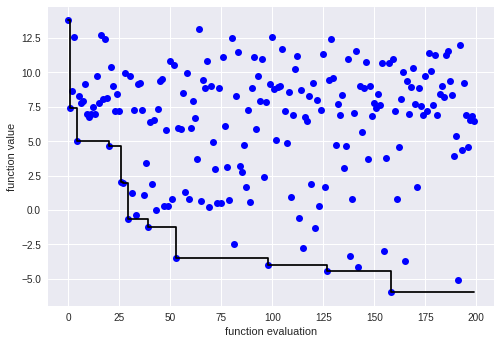

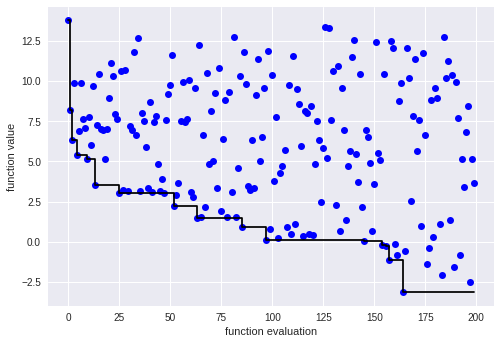

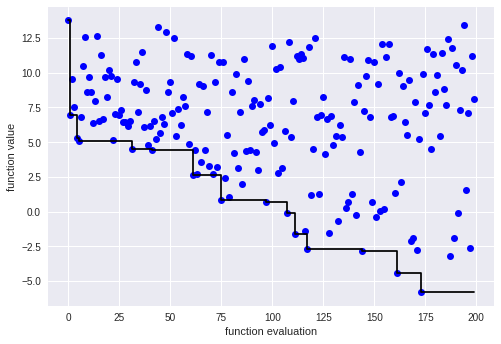

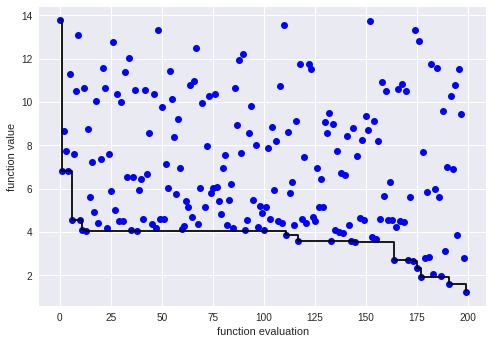

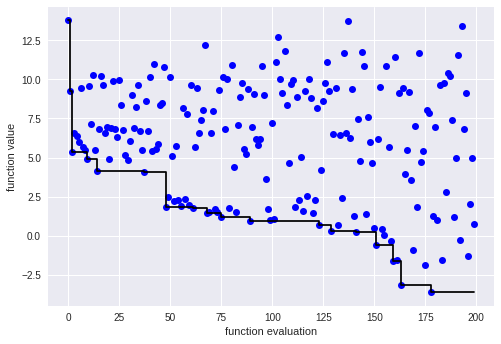

In [132]:
#%%pycodestyle

for i in range(0, val):
    plot_smac_performance(smac_list_gold[i], MAX_FUN_gold)

### SMAC Performance Bohachevsky Function

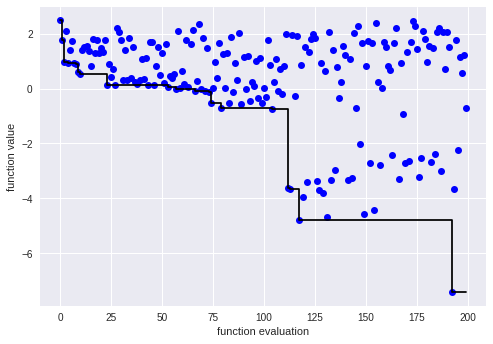

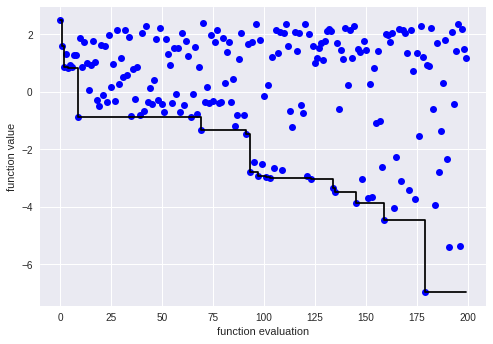

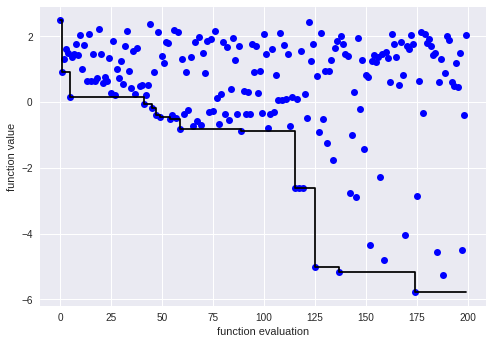

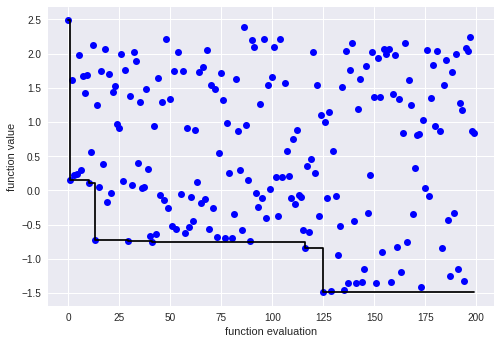

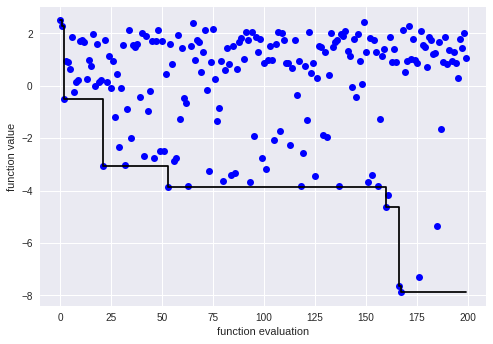

In [133]:
#%%pycodestyle

for i in range(0, val):
    plot_smac_performance(smac_list_boha[i], MAX_FUN_boha)

### SMAC Performance Branin Function

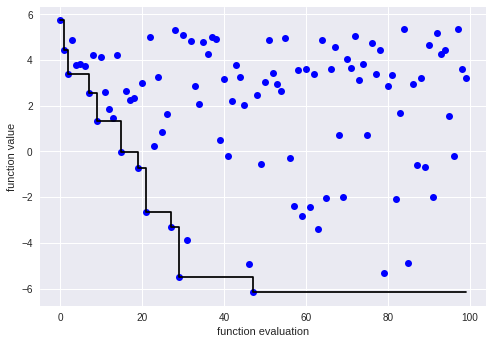

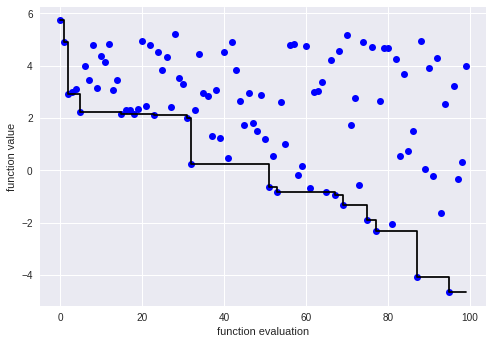

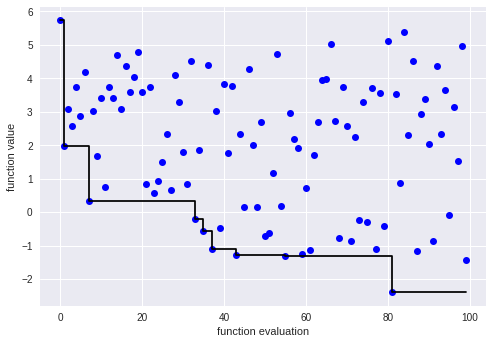

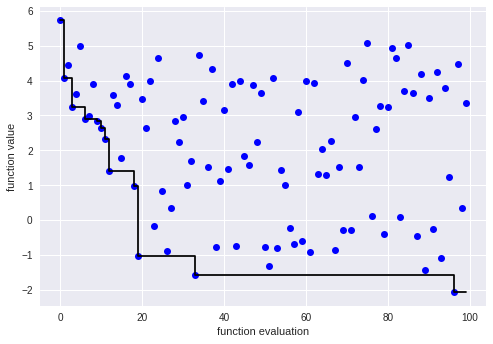

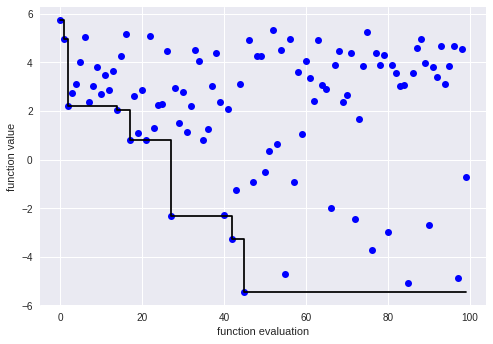

In [134]:
#%%pycodestyle

for i in range(0, val):
    plot_smac_performance(smac_list_branin[i], MAX_FUN_branin)

## Compare 20 runs

### Get Data Function

In [0]:
#%%pycodestyle

def get_data(smac):

    data = []

    for element in smac:
        # get runhistory, all runs ever evaluated by smac
        runhistory = element.get_runhistory()

        # extract x value and corresponding y value
        x_smac = []
        y_smac = []
        for entry in runhistory.data:  # iterate over data because it is an OrderedDict
            config_id = entry.config_id  # look up config id
            config = runhistory.ids_config[config_id]  # look up config
            y_ = runhistory.get_cost(config)  # get cost
            x_ = config["x1"]  # there is only one entry in our example
            x_smac.append(x_)
            y_smac.append(y_)
        x_smac = np.array(x_smac)
        y_smac = np.array(y_smac)
        data.append(y_smac)
    return data


### Plot Function

In [0]:
#%%pycodestyle

from matplotlib import mlab


def plot_performance(smac_list, MAX_FUN, fig, color, color_face):

    median2 = []
    first_quartel = []
    second_quartel = []
    data = get_data(smac_list)

    med_of_eval = []

    for j in range(0, MAX_FUN):

        for i in range(0, len(data)):
            med_of_eval.append(data[i][j])

        med_of_eval.sort()
        # a, b, c = mlab.prctile(med_of_eval, p=(25.0, 50.0, 75.0))
        median2.append(np.percentile(med_of_eval, 50))
        first_quartel.append(np.percentile(med_of_eval, 25))
        second_quartel.append(np.percentile(med_of_eval, 75))

    # print(first_quartel)
    # print(median2)
    # print(second_quartel)

    ax = fig.add_subplot(111)

    # Plotting
    plt.plot(median2, 'o', color=color)
    ax.fill_between(range(0, MAX_FUN), first_quartel,
                    second_quartel, alpha=0.5, facecolor=color_face, interpolate=True)

    plt.xlabel('function evaluation')
    plt.ylabel('loss')
    plt.xscale('log')

    plt.step(median2, 'k', where="post", color=color)  # please note that we use step function!


### SMAC Performance Goldstein Function

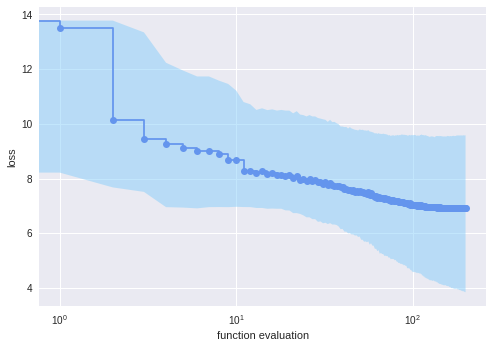

In [137]:
#%%pycodestyle

fig_gold = plt.figure()
plot_performance(smac_list_gold, MAX_FUN_gold, fig_gold, 'cornflowerblue', 'lightskyblue')

### SMAC Performance Bohachevsky Function

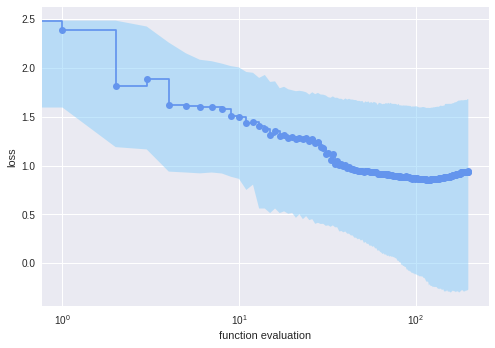

In [138]:
#%%pycodestyle

fig_boha = plt.figure()
plot_performance(smac_list_boha, MAX_FUN_boha, fig_boha, 'cornflowerblue', 'lightskyblue')

### SMAC Performance Branin Function

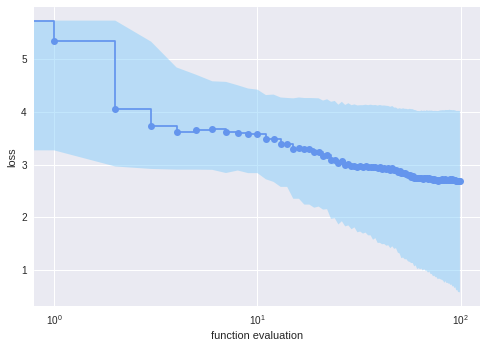

In [139]:
#%%pycodestyle

fig_branin = plt.figure()
plot_performance(smac_list_branin, MAX_FUN_branin, fig_branin, 'cornflowerblue', 'lightskyblue')

## Random Search Comparison

### Random Search on Goldstein Function

In [0]:
#%%pycodestyle

from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario


def run_random_search_goldstein():

    cs = ConfigurationSpace()

    x_points_gold = UniformFloatHyperparameter("x_points_gold", -2, 2, default_value=-2)
    y_points_gold = UniformFloatHyperparameter("y_points_gold", -2, 2, default_value=-2)

    cs.add_hyperparameters([x_points_gold, y_points_gold])

    scenario = Scenario({"run_obj": "quality",  # we optimize quality (alternative runtime)
                         "wallclock_limit": 20,  # time for running SMAC
                         "cs": cs,               # configuration space
                         "deterministic": "true",
                         "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                         "output_dir": ""        # deactivate output
                         })

    def rf_from_cfg(cfg, seed):
        return goldstein_func([cfg["x_points_gold"], cfg["y_points_gold"]])

    roar = ROAR(scenario, tae_runner=rf_from_cfg)

    incumbent = roar.optimize()

    print(incumbent)
    history = roar.get_runhistory()
    print("Cost: " + str(history.get_cost(incumbent)))

    return roar

Configuration:
  x_points_gold, Value: 0.01211341456328796
  y_points_gold, Value: -0.8999867027494286

Cost: 1.5268576280367372


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


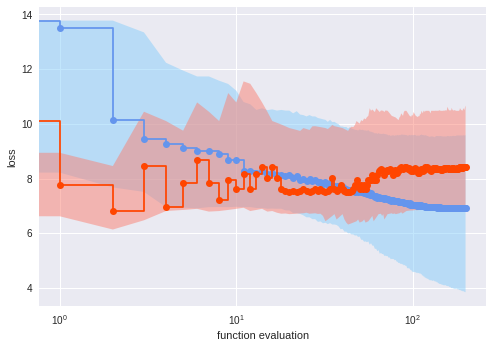

In [141]:
#%%pycodestyle

roar_gold = run_random_search_goldstein()

fig_gold2 = plt.figure()
plot_performance(smac_list_gold, MAX_FUN_gold, fig_gold2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_gold], MAX_FUN_gold, fig_gold2, 'orangered', 'salmon')


### Random Search on Bohachevsky Function

In [0]:
#%%pycodestyle

from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario


def run_random_search_bohachevsky():

    cs = ConfigurationSpace()

    x_points = UniformFloatHyperparameter("x_points", -100, 100, default_value=-100)
    y_points = UniformFloatHyperparameter("y_points", -100, 100, default_value=-100)

    cs.add_hyperparameters([x_points, y_points])

    scenario = Scenario({"run_obj": "quality",   # we optimize quality (alternative runtime)
                         "wallclock_limit": 20,  # time for running SMAC
                         "cs": cs,               # configuration space
                         "deterministic": "true",
                         "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                         "output_dir": "",       # deactivate output
                         "maxR": 1
                         })

    def rf_from_cfg(cfg, seed):
        return bohachevsky_func([cfg["x_points"], cfg["y_points"]])

    roar = ROAR(scenario, tae_runner=rf_from_cfg)

    incumbent = roar.optimize()

    print(incumbent)
    history = roar.get_runhistory()
    print("Cost: " + str(history.get_cost(incumbent)))

    return roar

Configuration:
  x_points, Value: 5.9633726174219674
  y_points, Value: -6.60605784122896

Cost: 4.813526498697932


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


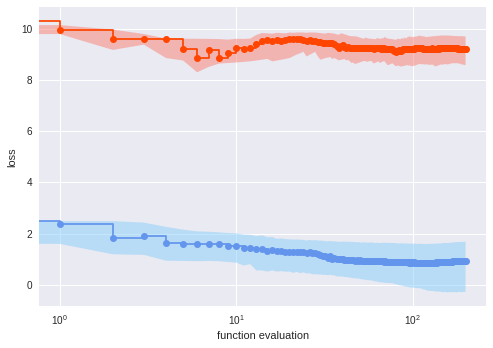

In [143]:
#%%pycodestyle

roar_boha = run_random_search_bohachevsky()

fig_boha2 = plt.figure()
plot_performance(smac_list_boha, MAX_FUN_boha, fig_boha2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_boha], MAX_FUN_boha, fig_boha2, 'orangered', 'salmon')


### Random Search on Branin Function

In [0]:
#%%pycodestyle

from smac.facade.roar_facade import ROAR
from smac.configspace import ConfigurationSpace
from ConfigSpace.hyperparameters import CategoricalHyperparameter, \
    UniformFloatHyperparameter, UniformIntegerHyperparameter, Hyperparameter
from smac.scenario.scenario import Scenario


def run_random_search_branin():

    cs = ConfigurationSpace()

    x_points = UniformFloatHyperparameter("x_points", -5, 10, default_value=-5)
    y_points = UniformFloatHyperparameter("y_points", -0, 15, default_value=0)

    cs.add_hyperparameters([x_points, y_points])

    scenario = Scenario({"run_obj": "quality",   # we optimize quality (alternative runtime)
                         "wallclock_limit": 20,  # time for running SMAC
                         "cs": cs,               # configuration space
                         "deterministic": "true",
                         "memory_limit": 3072,   # adapt this to reasonable value for your hardware
                         "output_dir": "",       # deactivate output
                         "maxR": 1
                         })

    def rf_from_cfg(cfg, seed):
        return branin_func([cfg["x_points"], cfg["y_points"]])

    roar = ROAR(scenario, tae_runner=rf_from_cfg)

    incumbent = roar.optimize()

    print(incumbent)
    history = roar.get_runhistory()
    print("Cost: " + str(history.get_cost(incumbent)))

    return roar

Configuration:
  x_points, Value: 2.981576651323399
  y_points, Value: 2.3470276173121385

Cost: -2.072952548864517


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


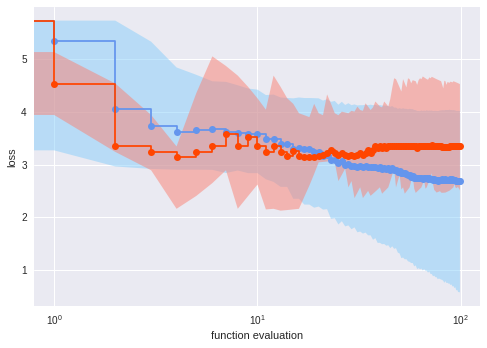

In [145]:
#%%pycodestyle

roar_branin = run_random_search_branin()

fig_branin2 = plt.figure()
plot_performance(smac_list_branin, MAX_FUN_branin, fig_branin2, 'cornflowerblue', 'lightskyblue')
plot_performance([roar_branin], MAX_FUN_branin, fig_branin2, 'orangered', 'salmon')